# 🏥 MedTech AI Opportunity Finder

- 🌍 Task: Generate quirky healthcare/pharma AI business opportunities with pain points and solutions.
- 🧠 Model: Uses OpenAI GPT-4o-mini for creative business idea generation
- 🎯 Process: Three-step pipeline - Business Area → Pain Point → AI Solution
- 📌 Output Format: Markdown-formatted responses streamed in real-time with humor
- 🔧 Tools: OpenAI API and IPython display for interactive streaming
- 🧑‍💻 Skill Level: Beginner

🛠️ Requirements
- ⚙️ Hardware: ✅ CPU is sufficient — no GPU required
- 🔑 OpenAI API Key
- IPython environment (Jupyter/Colab)

---
📢 Find more Agentic AI notebooks on my [GitHub repository](https://github.com/lisekarimi/agentverse)

## LLM Workflow

This 3-step process uses the prompt chaining pattern where each step builds on the previous response.

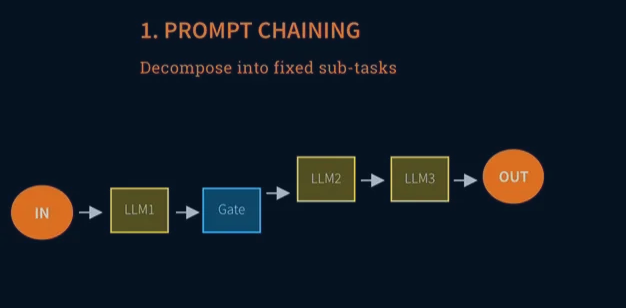

- Simple idea: Break a big problem into steps.
- Example: First LLM makes an outline → second LLM writes content.
- How it works: The output of one model becomes the input for the next.
- Why it helps: Keeps things structured and easier to solve step by step.
- Tip: If an early step is unclear or wrong, later steps will also be unclear or wrong (good input = good output, bad input = bad output).

In [2]:
from openai import OpenAI
from IPython.display import display, Markdown, update_display

In [3]:
client = OpenAI() # Automatically finds OPENAI_API_KEY without needing os.getenv() or load_dotenv().

In [4]:
def stream_response(messages, section_title):
    """Stream response and display with real-time updates"""
    response_stream = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=messages,
        stream=True
    )

    response = ""
    display_handle = display(Markdown(f"## {section_title}\n\n"), display_id=True)

    for chunk in response_stream:
        if chunk.choices[0].delta.content:
            response += chunk.choices[0].delta.content
            # Clean up any unwanted markdown artifacts
            cleaned_response = response.replace("```", "").replace("markdown", "")
            update_display(Markdown(f"## {section_title}\n\n{cleaned_response}"), display_id=display_handle.display_id)

    return response

In [5]:
# Step 1: Business area
messages = [{"role": "user", "content": "Give me a quirky healthcare or pharma business area for an AI agent. Keep it short and clear."}]
business_idea = stream_response(messages, "🏢 Business Area")

## 🏢 Business Area

**Personalized Medication Matching**: An AI agent that analyzes a patient's genetic makeup, lifestyle, and medical history to recommend the most effective medications and dosages tailored to their unique profile. This service could also include reminders for refills and alerts for potential drug interactions based on real-time health data.

In [6]:
# Step 2: Pain point
messages = [{"role": "user", "content": f"What's broken about {business_idea}? Short and funny."}]
pain_point = stream_response(messages, "😵 What's Broken")

## 😵 What's Broken

**"Personalized Medication Matching"** sounds great until your AI suggests you need more fish oil because you had sushi for lunch five times this week. And don’t get me started on the dosage—it treats you like Goldilocks, but instead of porridge, you're left with a cocktail of half the pharmacy. Plus, the refill reminders might just lead you to become best friends with your local pharmacist. Who needs a social life when you’ve got personalized alerts for every pill? At this rate, your biggest health risk might be the awkward conversations about your genetically tailored snack choices! 🍣💊

In [7]:
# Step 3: AI solution
messages = [{"role": "user", "content": f"How would an AI agent solve this {pain_point}? Brief and clear."}]
solution = stream_response(messages, "🤖 AI to the Rescue")

## 🤖 AI to the Rescue

An AI agent tackling "Personalized Medication Matching" would approach the problem using advanced algorithms that analyze individual health data, preferences, and dietary habits while still avoiding absurd suggestions. Here's how it could work:

1. **Data Integration**: Collect comprehensive data from user inputs, health history, and dietary patterns (like sushi consumption).
  
2. **Smart Recommendations**: Instead of generic suggestions, it would offer nuanced advice that considers dietary intake, avoiding contradictions (e.g., suggesting more fish oil after sushi).

3. **Customized Dosage Plans**: The AI would calculate optimal doses based on individual health profiles, minimizing unnecessary medications while addressing key health needs.

4. **Intelligent Alerts**: It would provide refill reminders and health tips without overwhelming the user, balancing helpfulness with practicality.

5. **Social Engagement**: The AI could offer ways to combine medication discussions with social activities, encouraging healthy conversations while avoiding awkward topics.

By focusing on personalization and practicality, the AI would enhance health management without turning everyday life into a medication maze!